# Wingsail Controller Prototype

In [2]:
# Install Python dependencies
!pip3 install numpy scipy matplotlib


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 1.3 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 2.0 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 1.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 2.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 3.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 1.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.7/310.7 KB 1.0 MB/s eta 0:00:0000:0100:01


In [3]:
# Imports
%matplotlib inline
import numpy as np
import scipy
import matplotlib.pyplot as plt


## Function `compute_reynolds_number` Implementation

It takes the apparent wind speed and the chord width to computes the Reynold's number. 

In [4]:
CHORD_WIDTH_MAIN_SAIL = 0.14  # meters, trim tab chord width is not included
KINEMATIC_VISCOSITY = 0.000014207  # {m^2 / s at 10degC} and air density at 1.225 {kg / m^3}


def compute_reynolds_number(apparent_wind_speed):
    reynolds_number = (apparent_wind_speed * CHORD_WIDTH_MAIN_SAIL) / KINEMATIC_VISCOSITY
    return reynolds_number

## Function `compute_angle_of_attack` Implementation

It takes the Reynolds number and uses a lookup table to find the angle of attack.

In [5]:
def compute_angle_of_attack(reynolds_number, look_up_table):
    desired_alpha = np.interp(reynolds_number, look_up_table[:, 0], look_up_table[:, 1])
    return desired_alpha

## Function `compute_trim_tab_angle` Implementation

It takes the desired alpha value and computes the resulting trim tab angle.

In [6]:
def compute_trim_tab_angle(desired_alpha, wind_direction, boat_direction):
    # additional variables to be used in future more in depth calculations
    trim_tab_angle = -desired_alpha
    return trim_tab_angle

## Testing sample values:

In [7]:
apparent_wind_speed = 10  # m/s
wind_direction = 0  # degrees
boat_direction = 0  # degrees
look_up_table = np.array(
    [[50000, 5.75], [100000, 6.75], [200000, 7], [500000, 9.75], [1000000, 10]]
)  # reynolds number, angle of attack

reynolds = compute_reynolds_number(apparent_wind_speed)
alpha = compute_angle_of_attack(reynolds, look_up_table)
trim_tab_angle = compute_trim_tab_angle(alpha, wind_direction, boat_direction)

print("Reynolds number: ", reynolds)
print("Angle of attack: ", alpha)
print("Trim tab angle: ", trim_tab_angle)

Reynolds number:  98542.97177447738
Angle of attack:  6.7208594354895475
Trim tab angle:  -6.7208594354895475


## Test 2: Wind direction at 40 degrees

In [ ]:
apparent_wind_speed = 7  # m/s
wind_direction = 40  # degrees
boat_direction = 0  # degrees
look_up_table = np.array(
    [[50000, 5.75], [100000, 6.75], [200000, 7], [500000, 9.75], [1000000, 10]]
)  # reynolds number, angle of attack

reynolds = compute_reynolds_number(apparent_wind_speed)
alpha = compute_angle_of_attack(reynolds, look_up_table)
trim_tab_angle = compute_trim_tab_angle(alpha, wind_direction, boat_direction)

print("Reynolds number: ", reynolds)
print("Angle of attack: ", alpha)
print("Trim tab angle: ", trim_tab_angle)

## Plot some stuff

In [ ]:
# Reference: https://matplotlib.org/stable/gallery/lines_bars_and_markers/fill_between_demo.html#example-confidence-bands
N = 21
x = np.linspace(0, 10, 11)
y = [3.9, 4.4, 10.8, 10.3, 11.2, 13.1, 14.1, 9.9, 13.9, 15.1, 12.5]

# fit a linear curve and estimate its y-values and their error.
a, b = np.polyfit(x, y, deg=1)
y_est = a * x + b
y_err = x.std() * np.sqrt(1 / len(x) + (x - x.mean()) ** 2 / np.sum((x - x.mean()) ** 2))

fig, ax = plt.subplots()
ax.plot(x, y_est, "-")
ax.fill_between(x, y_est - y_err, y_est + y_err, alpha=0.2)
ax.plot(x, y, "o", color="tab:brown")

##Graphical representation

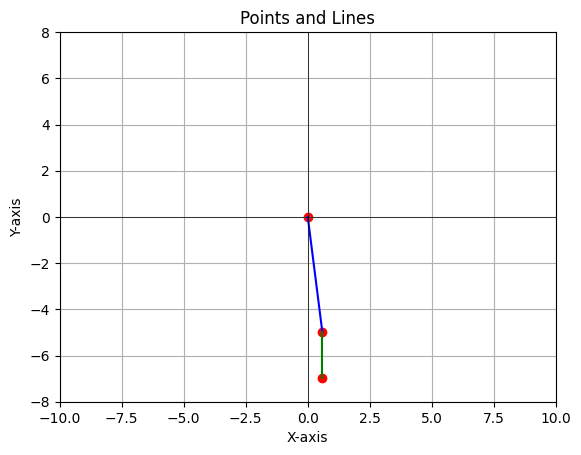

In [58]:
# Function to rotate a point around the origin
def rotate_mainsail(sail, theta):
    theta = (theta / 360) * 2 * 3.14159
    x, y = sail[1]
    x_new = x * np.cos(theta) - y * np.sin(theta)
    y_new = x * np.sin(theta) + y * np.cos(theta)
    sail[1] = [x_new, y_new]
    x, y = sail[2]
    x_new = x * np.cos(theta) - y * np.sin(theta)
    y_new = x * np.sin(theta) + y * np.cos(theta)
    sail[2] = [x_new, y_new]
    return sail


def rotate_trimtab(sail, angle):
    """
    Rotate a point around another point by a given angle.

    Args:
    - point: Coordinates of the point to be rotated (x, y)
    - angle: Angle of rotation in radians
    - center: Coordinates of the center point for rotation (x, y)

    Returns:
    - Rotated point coordinates (x', y')
    """
    center = sail[1]
    point = sail[2]
    angle = (angle / 360) * 2 * 3.14159
    # Translate the point to the origin
    translated_point = [point[0] - center[0], point[1] - center[1]]

    # Perform rotation using the rotation matrix
    rotated_x = translated_point[0] * np.cos(angle) - translated_point[1] * np.sin(angle)
    rotated_y = translated_point[0] * np.sin(angle) + translated_point[1] * np.cos(angle)

    # Translate the rotated point back to its original position
    final_x = rotated_x + center[0]
    final_y = rotated_y + center[1]
    sail[2] = [final_x, final_y]
    return sail


# Define the points
point1 = [0, 0]
point2 = [0, -5]
point3 = [0, -7]
wingsail = [point1, point2, point3]

wingsail = rotate_trimtab(wingsail, trim_tab_angle)
wingsail = rotate_mainsail(wingsail, alpha)


# Create lists for x and y coordinates of the points
x_values = [wingsail[0][0], wingsail[1][0], wingsail[2][0]]
y_values = [wingsail[0][1], wingsail[1][1], wingsail[2][1]]

# Plot the points
plt.scatter(x_values, y_values, color="red")

# Plot the lines between the points
plt.plot([x_values[0], x_values[1]], [y_values[0], y_values[1]], color="blue")
plt.plot([x_values[1], x_values[2]], [y_values[1], y_values[2]], color="green")

# Set plot labels and title
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Points and Lines")

plt.xlim(-10, 10)  # setting x-axis limits from 0 to 6
plt.ylim(-8, 8)  # setting y-axis limits from 0 to 12


# Show the plot
plt.grid(True)
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)
plt.show()